In [0]:
# mlp for regression
from numpy import sqrt
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import Dense

In [2]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(path, header=None)
print(df.shape)
df.head()

(506, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# scaling data
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = MinMaxScaler()

(339, 13) (167, 13) (339,) (167,)


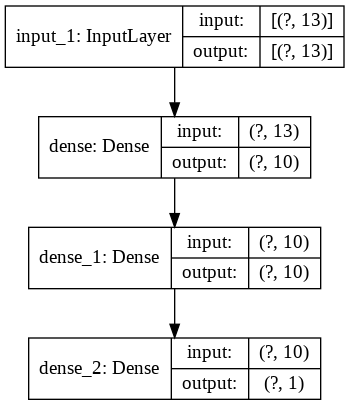

In [4]:
# define model
inputs = keras.Input(shape=(X_train.shape[1],))
x = Dense(10, activation='relu', kernel_initializer='he_normal')(inputs)
x = Dense(10, activation='relu', kernel_initializer='he_normal')(x)
outputs = Dense(1)(x)
model = keras.Model(inputs=inputs, outputs=outputs)

# compile model
model.compile(optimizer='adam', loss='mse')

# fit model
history = model.fit(X_train, y_train, epochs = 150, batch_size=64, verbose=0, validation_split=0.3)

# plot model
keras.utils.plot_model(model, show_shapes=True)

In [5]:
# evaluate model
#y_eval = sc_y.transform(y_test.reshape(-1,1))
print("rmse = ", sqrt(model.evaluate(X_test, y_test)))

6/6 [==============================] - 0s 2ms/step - loss: 44.0310
rmse =  6.6355840241682476


In [6]:
# make a prediction
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
yhat = model.predict(sc_X.transform([row]))
print('Predicted: %.3f' % yhat)

Predicted: 26.440


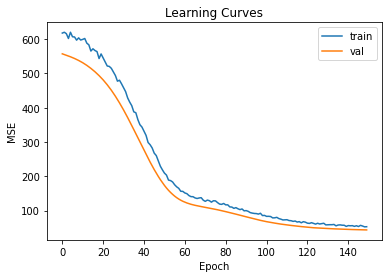

In [7]:
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()